In [1]:

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import plot_confusion_matrix, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier



with open('/Users/erlend/Documents/COGS_118/Project/csv 2/datafile.txt','r') as f:
    X = np.loadtxt(f)
f.close()

with open('/Users/erlend/Documents/COGS_118/Project/csv 2/labels.txt','r') as f:
    y = np.loadtxt(f, dtype=str)
f.close()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [2]:
clf = DecisionTreeClassifier()

pipe = Pipeline(steps = [('clf', clf)])

grid = GridSearchCV(pipe, param_grid = {'clf__max_depth': [5,10,20]}, cv=5, verbose = 3)
grid.fit(X_train, y_train)

best = grid.best_estimator_
print(grid.cv_results_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..................clf__max_depth=5;, score=0.708 total time=  39.3s
[CV 2/5] END ..................clf__max_depth=5;, score=0.707 total time=  36.5s
[CV 3/5] END ..................clf__max_depth=5;, score=0.708 total time=  41.1s
[CV 4/5] END ..................clf__max_depth=5;, score=0.707 total time=  42.9s
[CV 5/5] END ..................clf__max_depth=5;, score=0.707 total time=  40.0s
[CV 1/5] END .................clf__max_depth=10;, score=0.864 total time=  56.7s
[CV 2/5] END .................clf__max_depth=10;, score=0.862 total time= 1.0min
[CV 3/5] END .................clf__max_depth=10;, score=0.862 total time=  55.0s
[CV 4/5] END .................clf__max_depth=10;, score=0.858 total time=  56.2s
[CV 5/5] END .................clf__max_depth=10;, score=0.862 total time=  55.1s
[CV 1/5] END .................clf__max_depth=20;, score=0.941 total time= 1.3min
[CV 2/5] END .................clf__max_depth=20;,

In [6]:
clf_20 = DecisionTreeClassifier(max_depth = 20)
clf_20.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [10]:
clf_40 = DecisionTreeClassifier(max_depth = 40)
clf_40.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=40)

hei


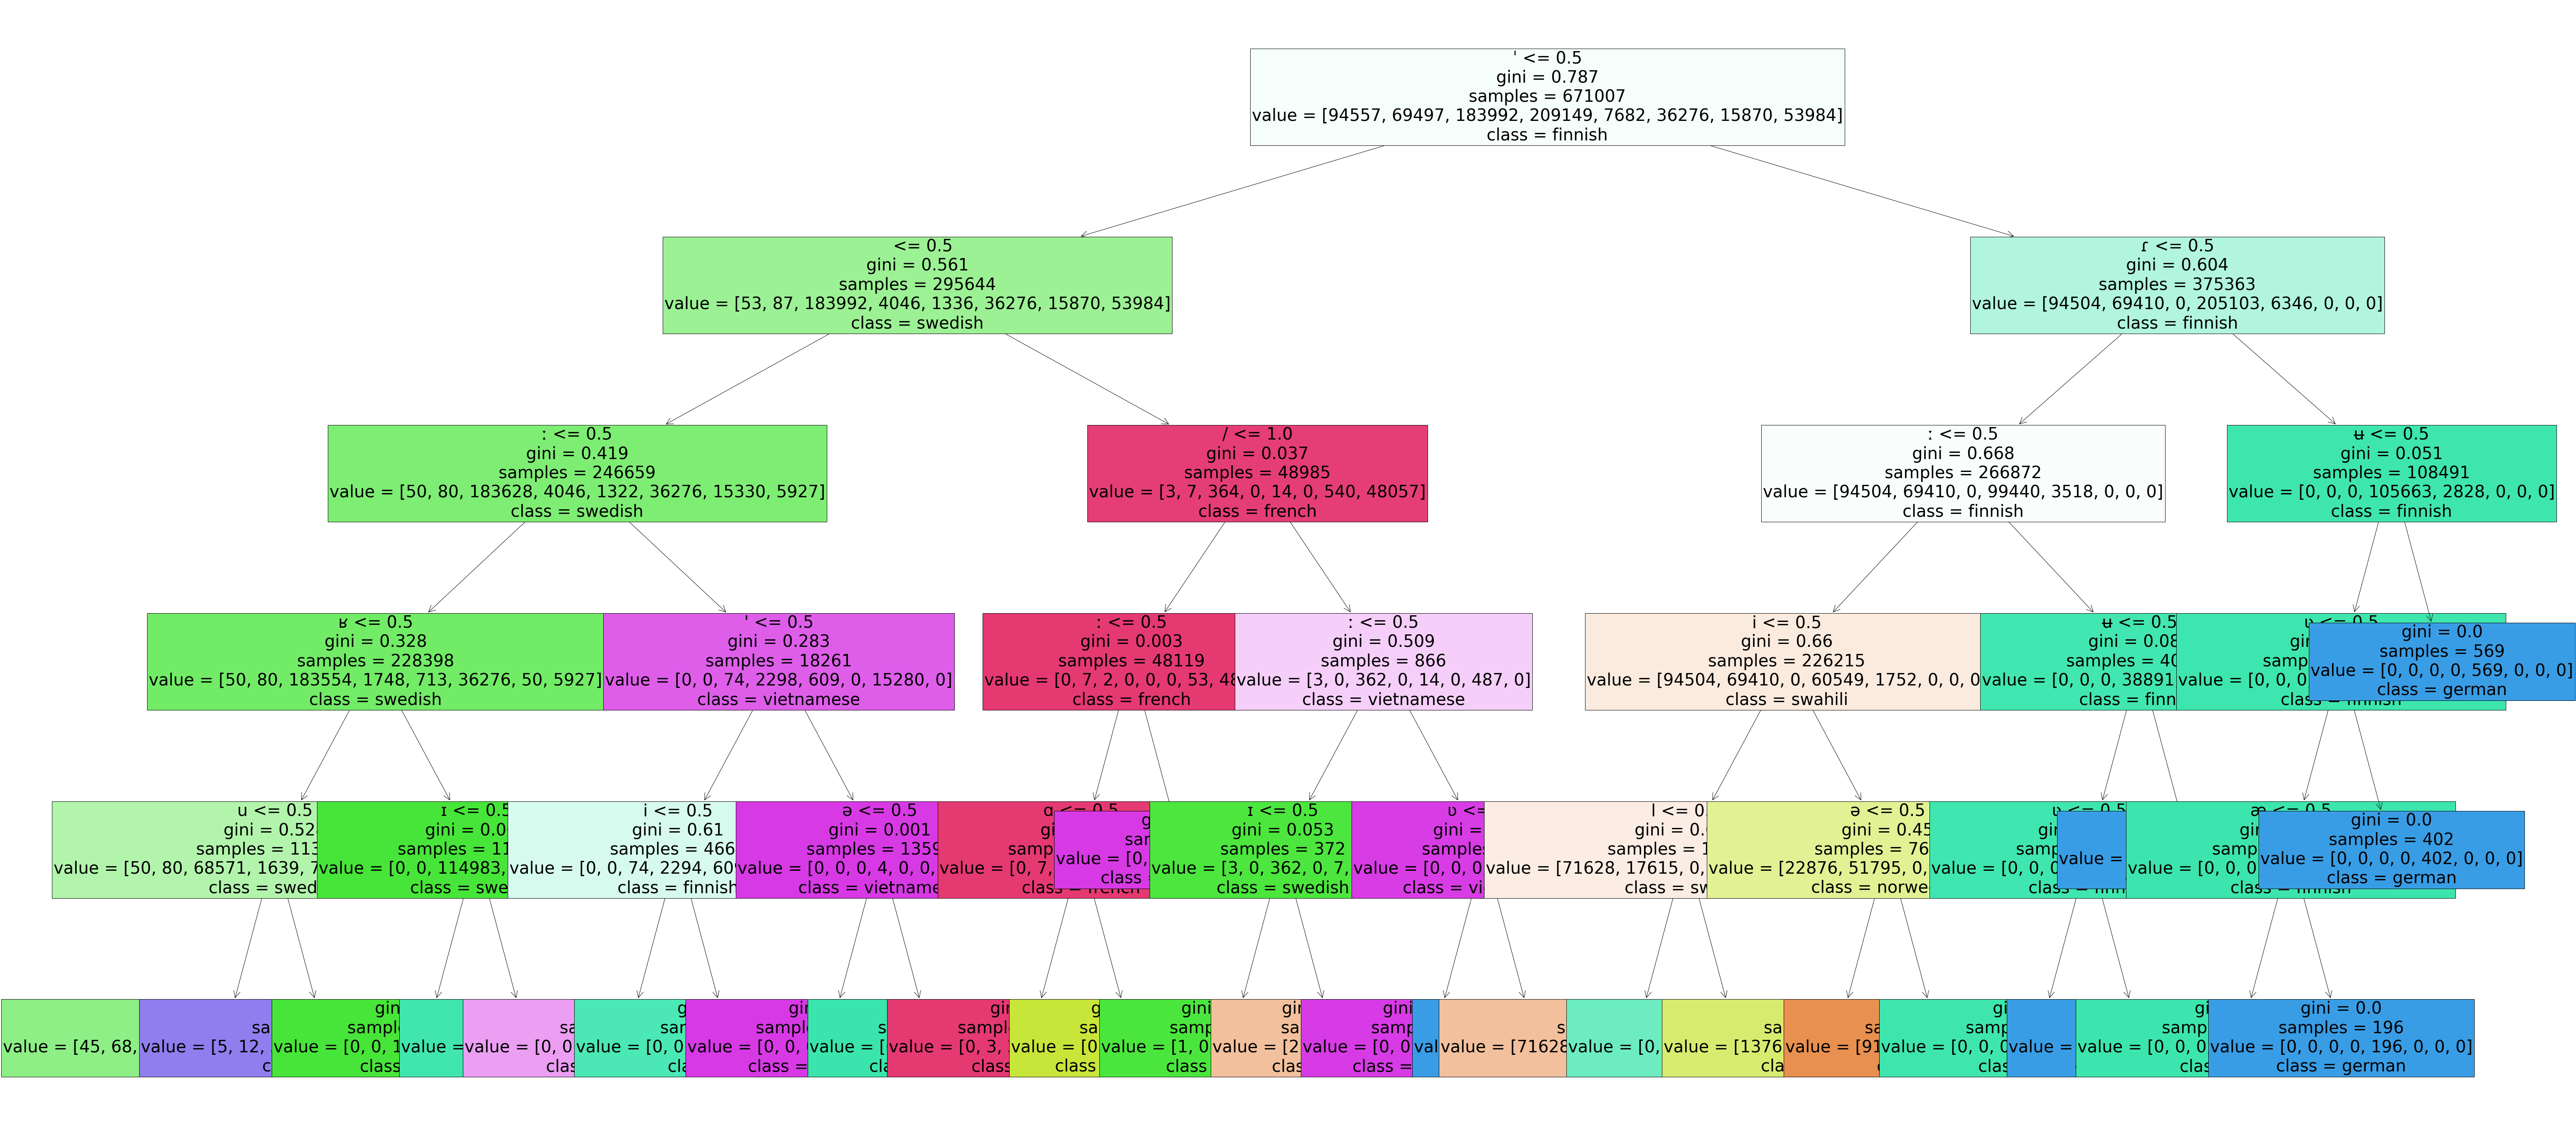

In [22]:
import matplotlib.pyplot as plt
from sklearn import tree

features = ['A', 'ɓ', 'a', 'ɗ', 'o', 'n', 'i', 'l', 'h', 'e', 'θ', 'ɾ', 'm', 'k', 'u', 's', 'f', 'ɠ', 't', 'p', 'z', 'ʄ', 'j', 'ⁿ', 'w', 'ᵐ', 'ᵑ', 'g', 'ʃ', 'B', 'c', 'ɲ', 'C', 'D', 'E', 'F', 'I', 'L', 'M', 'O', 'N', 'G', 'H', 'J', 'K', 'ʒ', 'v', 'ŋ', 'P', 'R', 'S', 'T', "'", 'U', 'V', 'W', 'Y', 'Z', 'x', '-', 'ɑ', 'b', 'ɔ', 'd', 'ɪ', 'ˈ', 'ː', 'ə', 'ʊ', 'ʈ', 'ʉ', 'ɖ', 'ʋ', 'y', 'ʂ', 'ɛ', 'æ', 'ʏ', ' ', 'œ', 'ʔ', '/', ',', 'ɳ', 'ɭ', 'ø', 'ç', '̩', 'ɥ', 'ɱ', 'ɽ', 'r', 'ɧ', '²', 'ɵ', 'ä', 'ɕ', '?', '.', 'ˌ', 'ž', 'é', 'š', 'q', 'è', 'û', 'å', 'χ', 'ɐ', '̯', 'ʀ', 'ʁ', 'ɡ', 'ĭ', 'ʧ', '͡', '(', ')', 'ˀ', '͜', 'ã', '\u2060', '[', '̃', 'ˑ', 'ʰ', ']', 'Q', 'ᵻ', 'õ', '̍', '̥', '̆', '\u200b', 'ɘ', '…', '|', ':', 'ɹ', 'ɫ', 'ɝ', 'ð', '˧', '˥', '˦', '˨', 'ɤ', '˩', 'ɣ', 'ă', 'ɯ', 'ʐ', 'ʼ', 'β', 'ʎ', 'ʝ', 'ɒ', 'ǧ', 'ɢ', 'î', 'ŝ', 'ĝ', 'ب', 'ل', 'ا', 'ف', 'ص', 'ه', '!', 'ğ', 'ô', 'ü', 'ē', 'í', 'ǐ', '�', 'ú', 'à', '’', 'ش', 'و', 'ر', 'ṣ', 'ʻ', 'س', 'م', 'ɴ', 'ʑ', 'ɰ', 'ᵝ', 'ɸ', 'っ', 'ッ', 'ヮ', 'ヶ', 'ゎ', '̪', 'ʱ', 'ũ', 'ĩ', 'ẽ']
targets = ['swahili','norwegian','swedish','finnish', 'german', 'english', 'vietnamese', 'french', 'spanish', 'farsi', 'japanese', 'malay', 'orayi']

best = DecisionTreeClassifier(max_depth = 5)
best.fit(X_train, y_train)
print("hei")
fig, axe = plt.subplots(figsize=(100,50))
tree.plot_tree(best, ax = axe, fontsize=40,
                   feature_names = features,  
                   class_names = targets,
                   filled=True)
plt.show()

fig.savefig("decistion_tree.png")

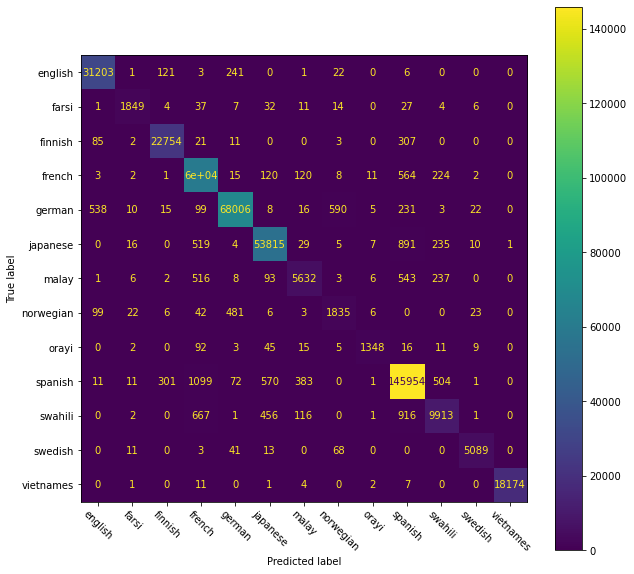

0.9706656149118167


In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

#clf_test = DecisionTreeClassifier(max_depth = 5)
#clf_test.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_40, X_test, y_test, ax = ax)
plt.xticks(rotation = -45)
plt.show()

print(clf_40.score(X_test, y_test))

In [33]:
text_representation = tree.export_text(clf_test, features)
print(text_representation)

|--- ˈ <= 0.50
|   |---   <= 0.50
|   |   |--- ː <= 0.50
|   |   |   |--- ʁ <= 0.50
|   |   |   |   |--- u <= 0.50
|   |   |   |   |   |--- class: french
|   |   |   |   |--- u >  0.50
|   |   |   |   |   |--- class: swahili
|   |   |   |--- ʁ >  0.50
|   |   |   |   |--- ɪ <= 0.50
|   |   |   |   |   |--- class: french
|   |   |   |   |--- ɪ >  0.50
|   |   |   |   |   |--- class: german
|   |   |--- ː >  0.50
|   |   |   |--- ' <= 0.50
|   |   |   |   |--- i <= 0.50
|   |   |   |   |   |--- class: swedish
|   |   |   |   |--- i >  0.50
|   |   |   |   |   |--- class: german
|   |   |   |--- ' >  0.50
|   |   |   |   |--- ə <= 0.50
|   |   |   |   |   |--- class: swedish
|   |   |   |   |--- ə >  0.50
|   |   |   |   |   |--- class: german
|   |---   >  0.50
|   |   |--- / <= 1.00
|   |   |   |--- ː <= 0.50
|   |   |   |   |--- ɑ <= 0.50
|   |   |   |   |   |--- class: vietnames
|   |   |   |   |--- ɑ >  0.50
|   |   |   |   |   |--- class: finnish
|   |   |   |--- ː >  0.50
|   |   |

/Users/erlend/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass feature_names=['A', 'ɓ', 'a', 'ɗ', 'o', 'n', 'i', 'l', 'h', 'e', 'θ', 'ɾ', 'm', 'k', 'u', 's', 'f', 'ɠ', 't', 'p', 'z', 'ʄ', 'j', 'ⁿ', 'w', 'ᵐ', 'ᵑ', 'g', 'ʃ', 'B', 'c', 'ɲ', 'C', 'D', 'E', 'F', 'I', 'L', 'M', 'O', 'N', 'G', 'H', 'J', 'K', 'ʒ', 'v', 'ŋ', 'P', 'R', 'S', 'T', "'", 'U', 'V', 'W', 'Y', 'Z', 'x', '-', 'ɑ', 'b', 'ɔ', 'd', 'ɪ', 'ˈ', 'ː', 'ə', 'ʊ', 'ʈ', 'ʉ', 'ɖ', 'ʋ', 'y', 'ʂ', 'ɛ', 'æ', 'ʏ', ' ', 'œ', 'ʔ', '/', ',', 'ɳ', 'ɭ', 'ø', 'ç', '̩', 'ɥ', 'ɱ', 'ɽ', 'r', 'ɧ', '²', 'ɵ', 'ä', 'ɕ', '?', '.', 'ˌ', 'ž', 'é', 'š', 'q', 'è', 'û', 'å', 'χ', 'ɐ', '̯', 'ʀ', 'ʁ', 'ɡ', 'ĭ', 'ʧ', '͡', '(', ')', 'ˀ', '͜', 'ã', '\u2060', '[', '̃', 'ˑ', 'ʰ', ']', 'Q', 'ᵻ', 'õ', '̍', '̥', '̆', '\u200b', 'ɘ', '…', '|', ':', 'ɹ', 'ɫ', 'ɝ', 'ð', '˧', '˥', '˦', '˨', 'ɤ', '˩', 'ɣ', 'ă', 'ɯ', 'ʐ', 'ʼ'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result